In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [2]:
df_raw = pd.read_csv("D:/Abhishek/exam 1/Machine Learning Exam Paper 1/Datasets/bank.csv", delimiter=";")

In [3]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_raw.shape

(41188, 21)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No Null Values

In [6]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df_raw.describe(include = "object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Primary analysis of the several categorical features

In [8]:
df_raw.job.unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [9]:
len(df_raw.job.unique()) # there are 12 categories of the job

12

In [10]:
df_raw.marital.unique()
# there are 4 categories of the martital status

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [11]:
df_raw.education.unique()
# there are 8 types of diffrent values in education 

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [12]:
df_raw.housing.unique()
# there are 3 types of diffrent values in housing 

array(['no', 'yes', 'unknown'], dtype=object)

In [13]:
df_raw.default.unique()
# there are 3 types of diffrent values in default 

array(['no', 'unknown', 'yes'], dtype=object)

In [14]:
#Univariate analysis
# lets plot the Count plot for categorical features


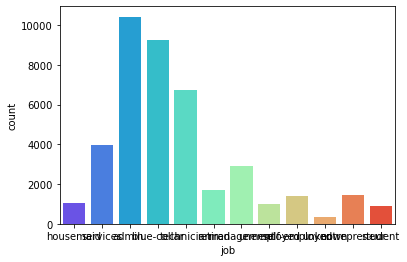

In [15]:
sns.countplot(x= "job",palette="rainbow", data = df_raw)
plt.show()

There are more no people working in as admin , blue color and tecnician

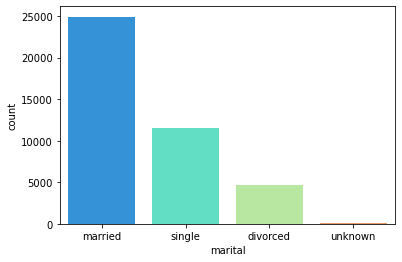

In [16]:
sns.countplot(x= "marital",palette="rainbow", data = df_raw)
plt.show()

there are more no of people married

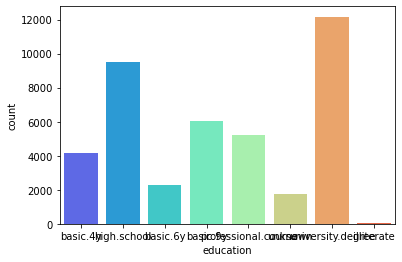

In [17]:
sns.countplot(x= "education",palette="rainbow", data = df_raw)
plt.show()

there are more no of people with university degree

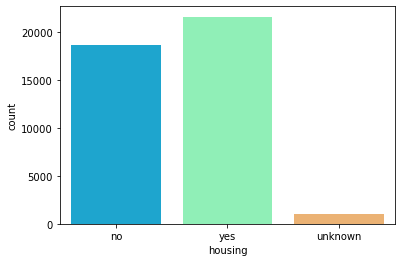

In [18]:
sns.countplot(x= "housing",palette="rainbow", data = df_raw)
plt.show()

there are more no of people with housing as yes

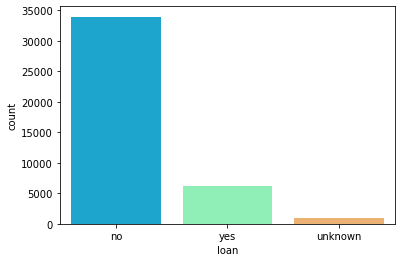

In [19]:
sns.countplot(x= "loan",palette="rainbow", data = df_raw)
plt.show()

more no of people has no loan

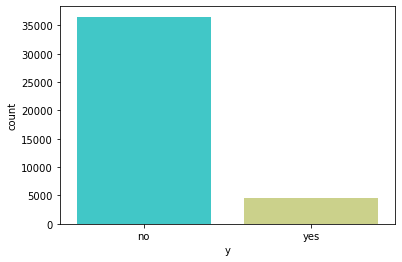

In [20]:
sns.countplot(x= "y",palette="rainbow", data = df_raw)
plt.show()

very less no of people has opterd for the term deposit

Exploratory Data Analysis

In [21]:
# check for the missing values.
df_raw.isnull().value_counts().sum()

41188

There is no missing values in the entire dataframe 

In [22]:
df_raw.shape

(41188, 21)

Label encoding for the target varible

In [23]:
df_raw["y"]= df_raw["y"].replace(to_replace =["no", "yes"], 
                            value =["0", "1"])

In [24]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
df_cat = df_raw.select_dtypes(include=['object'])

In [26]:
df_num = df_raw.select_dtypes(exclude=['object'])

In [27]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


ONe hot encoding of the categorical varible

In [28]:
data_cat_dummies  = pd.get_dummies(df_cat,drop_first=True)

In [29]:
data_cat_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
df_final = pd.concat([df_num, data_cat_dummies], axis=1)

In [31]:
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_1
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
df_final.shape

(41188, 54)

In [33]:
X = df_final.drop(columns=["y_1"])

In [34]:
X_2 = X.copy(deep=True)

In [35]:
X_2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [36]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [37]:
Y = df_final["y_1"]

In [38]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_1, dtype: uint8

Now train test split 

In [39]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (28831, 53)
X_test  (12357, 53)
y_train  (28831,)
y_test  (12357,)


Feature selection using ramdom forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
ins = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the classifier
ins.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [41]:
ins.feature_importances_

array([8.49361518e-02, 2.89889973e-01, 4.13885301e-02, 3.17851046e-02,
       1.67137004e-02, 2.26197153e-02, 2.48943600e-02, 2.71466291e-02,
       1.03915490e-01, 5.26613528e-02, 9.60732247e-03, 4.19478524e-03,
       2.96928129e-03, 7.20536398e-03, 6.33915454e-03, 4.43322443e-03,
       6.99688683e-03, 4.42572698e-03, 1.10436774e-02, 4.33173604e-03,
       1.57113348e-03, 1.25334813e-02, 1.13141369e-02, 6.88456854e-04,
       5.04015868e-03, 8.31343527e-03, 1.15064591e-02, 1.85994292e-04,
       8.86647723e-03, 1.30318776e-02, 4.93138549e-03, 8.78938165e-03,
       4.17378022e-10, 2.48333437e-03, 1.90500555e-02, 2.33106399e-03,
       1.30686880e-02, 1.05224667e-02, 2.58555959e-03, 8.78722086e-04,
       2.59200868e-03, 3.12954406e-03, 4.67695250e-03, 5.56440106e-03,
       2.33158393e-03, 5.39326824e-03, 3.04990499e-03, 1.18749791e-02,
       1.19977535e-02, 1.12272037e-02, 1.13523364e-02, 8.36443614e-03,
       2.32551937e-02])

In [42]:
from sklearn.feature_selection import SelectFromModel
sle = SelectFromModel(ins, threshold=0.01)

In [43]:
sle.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                threshold=0.01)

In [44]:
sle.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 18, 21, 22, 26, 29, 34, 36,
       37, 47, 48, 49, 50, 52], dtype=int64)

In [45]:
feat_labels = X.columns.values
selected_features = []
# Print the names of the most important features
for feature_list_index in sle.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])

In [46]:
selected_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_technician',
 'marital_married',
 'marital_single',
 'education_high.school',
 'education_university.degree',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_success']

In [47]:
data_selected = df_final[selected_features]
data_selected.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_high.school,education_university.degree,housing_yes,loan_yes,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,1,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,1,0,1,1,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,1,1,0,0,0,0


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_standardised = scaler.fit_transform(data_selected)

In [49]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X = data_standardised
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (28831, 23)
X_test  (12357, 23)
y_train  (28831,)
y_test  (12357,)


KNN

In [50]:

knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [51]:
y_H= y_test.astype(str)

In [55]:
yy_pred = knn_model.predict(X_test)

In [52]:
def get_test_report(model):
     
    test_pred = model.predict(X_test)

    
    return(classification_report(y_test, test_pred))

In [57]:
conf = confusion_matrix(y_test, yy_pred)
print(conf)

[[10538   397]
 [  998   424]]


In [59]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10935
           1       0.52      0.30      0.38      1422

    accuracy                           0.89     12357
   macro avg       0.71      0.63      0.66     12357
weighted avg       0.87      0.89      0.87     12357



In [162]:
from sklearn import metrics

# create a list of column names
cols = ['Model','Accuracy Score',]

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
KNN = pd.Series({'Model': "KNN",'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(KNN , ignore_index = True)

# view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.897143


Logistic Regression

In [163]:
import statsmodels.api as sm
X_1 = sm.add_constant(X_2)

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [164]:
X_1

,const,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.0,56,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,1.0,57,149,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
2,1.0,37,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
3,1.0,40,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
4,1.0,56,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.0,73,334,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41184,1.0,46,383,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41185,1.0,56,189,2,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41186,1.0,44,442,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.30, random_state = 10) #train_test_split imported from sklearn

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (28831, 54)
y_train (28831,)
X_test (12357, 54)
y_test (12357,)


In [166]:
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


         Current function value: inf
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    y_1   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28778
Method:                           MLE   Df Model:                           52
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:                     inf
Time:                        19:33:10   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -247.9418     45.728     -5.422      0.000    -337.566    -158.318
age          

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [167]:
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

29773    0.091206
14070    0.114476
39364    0.673820
29279    0.054258
11888    0.004717
dtype: float64

In [168]:
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob] #We can write 0 instead of '0' directly

In [169]:
y_H= y_test.astype(str)

In [170]:
confusion_matrix(y_H, y_pred)

array([[10617,   318],
       [  834,   588]], dtype=int64)

In [186]:
test_report = classification_report(y_test, y_pred)
print(test_report)


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10935
           1       0.58      0.39      0.47      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.68      0.71     12357
weighted avg       0.88      0.90      0.89     12357



In [187]:
Logistic_Regression = pd.Series({'Model': "Logistic_Regression",'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_Regression , ignore_index = True)

# view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.897143
1,Logistic_Regression,0.000000
2,SVM,0.897143
3,ADA,0.897143
4,ADA,0.897143
5,Logistic_Regression,0.897143


SVM using  linear

In [173]:
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(X_train, y_train) 

SVC(kernel='linear')

In [174]:
y_pred = svclassifier.predict(X_test)

In [175]:
confusion_matrix(y_test, y_pred)

array([[10529,   406],
       [  865,   557]], dtype=int64)

In [176]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10935
           1       0.58      0.39      0.47      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.68      0.71     12357
weighted avg       0.88      0.90      0.89     12357



In [177]:
SVM = pd.Series({'Model': "SVM",'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(SVM , ignore_index = True)

# view the result table
result_tabulation

,Model,Accuracy Score
0,KNN,0.897143
1,Logistic_Regression,0.000000
2,SVM,0.897143


AdaBoostClassifier

In [178]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)


AdaBoostClassifier(random_state=10)

In [179]:

y_pred_adaboost  = adaboost.predict(X_test)

In [183]:
confusion_matrix(y_test, y_pred_adaboost)

array([[10656,   279],
       [  886,   536]], dtype=int64)

In [184]:
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10935
           1       0.66      0.38      0.48      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.68      0.71     12357
weighted avg       0.89      0.91      0.89     12357



In [185]:
ADA = pd.Series({'Model': "ADA",'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(ADA , ignore_index = True)

# view the result table
result_tabulation



,Model,Accuracy Score
0,KNN,0.897143
1,Logistic_Regression,0.000000
2,SVM,0.897143
3,ADA,0.897143
4,ADA,0.897143
